In [9]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

data=pd.read_csv("mnist_train.csv")
sample=data.iloc[0:1000]

print(sample.shape)
print(sample.head)

(1000, 785)
<bound method NDFrame.head of      label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0        1       0       0       0       0       0       0       0       0   
1        0       0       0       0       0       0       0       0       0   
2        1       0       0       0       0       0       0       0       0   
3        4       0       0       0       0       0       0       0       0   
4        0       0       0       0       0       0       0       0       0   
5        0       0       0       0       0       0       0       0       0   
6        7       0       0       0       0       0       0       0       0   
7        3       0       0       0       0       0       0       0       0   
8        5       0       0       0       0       0       0       0       0   
9        3       0       0       0       0       0       0       0       0   
10       8       0       0       0       0       0       0       0       0   
11       9       0    

In [11]:
labels=sample["label"]
raw_data=sample.drop("label",axis=1)

print(labels.shape,raw_data.shape)

(1000,) (1000, 784)


C:\Users\Abhishek Bhargav\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


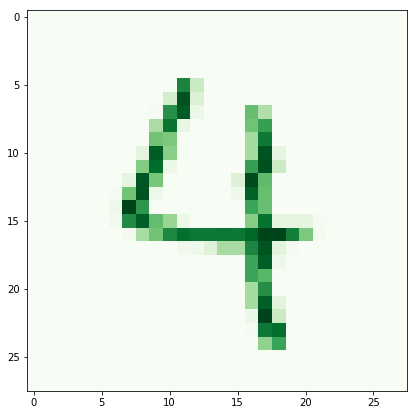

4


In [19]:
plt.figure(figsize=(7,7))

grid_data=raw_data.iloc[999].as_matrix().reshape(28,28)
plt.imshow(grid_data, interpolation="none", cmap="Greens")
plt.show()

print(labels[999])

In [23]:
from sklearn.preprocessing import StandardScaler
std_data= StandardScaler().fit_transform(raw_data)


cov_matrix= np.matmul(std_data.T,std_data)
print(cov_matrix.shape)

C:\Users\Abhishek Bhargav\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Abhishek Bhargav\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


(784, 784)


In [25]:
from scipy.linalg import eigh

eigenval,eigenvec=eigh(cov_matrix, eigvals=(782,783))
vectors=eigenvec.T

print(vectors.shape)

(2, 784)


In [31]:
new_coordinates=np.matmul(vectors, std_data.T)

new_coordinates=np.vstack((new_coordinates,labels)).T
dataframe=pd.DataFrame(data=new_coordinates, columns=("p1","p2","labels"))
print(dataframe.head())

         p1         p2  labels
0 -6.065084  -5.166641     1.0
1  4.575014  18.631222     0.0
2 -2.468608  -7.647340     1.0
3  2.429640  -1.122921     4.0
4  5.547535  25.357884     0.0


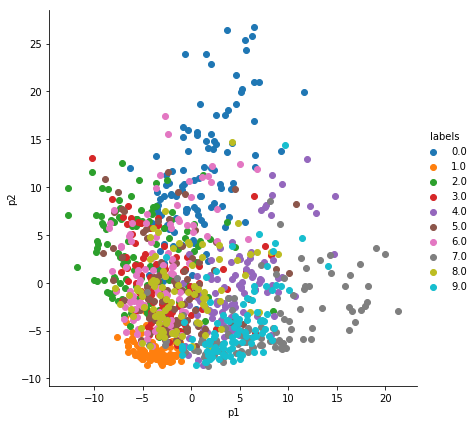

In [32]:
sn.FacetGrid(dataframe, hue="labels", height=6)\
  .map(plt.scatter,"p1","p2")\
  .add_legend()
plt.show()


In [33]:
from sklearn import decomposition
pca = decomposition.PCA()


In [42]:
pca.n_components = 2
pca_data = pca.fit_transform(std_data)

# pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (1000, 2)


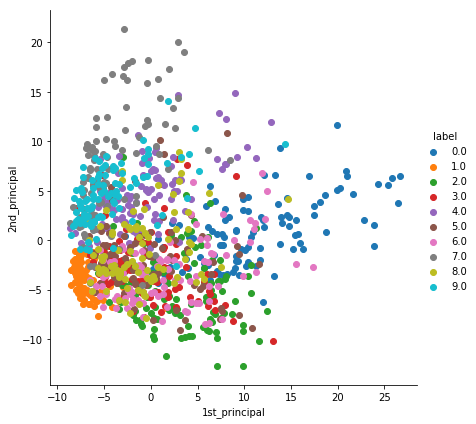

In [43]:

pca_data = np.vstack((pca_data.T, labels)).T

pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", height=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

C:\Users\Abhishek Bhargav\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


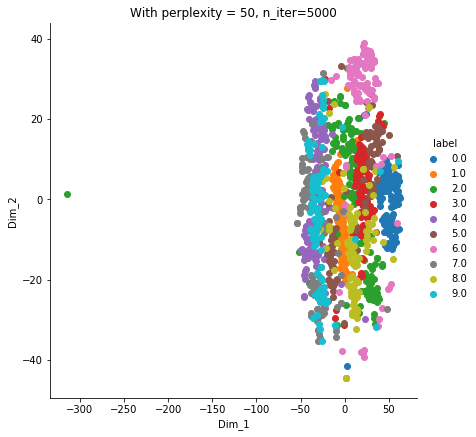

In [47]:
from sklearn.manifold import TSNE

model=TSNE(n_components=2, random_state=0, perplexity=50, n_iter=5000)
tsne_data=model.fit_transform(std_data)

tsne_data=np.vstack((tsne_data.T, labels)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50, n_iter=5000')
plt.show()